# Playing with data!

For this exercise, I'll use the Algarve Dataset. 
Why? All the images have different sizes, which makes this task more fun!

In [24]:
import os
from PIL import Image
from pathlib import Path
import numpy as np
import torch
from torchvision import datasets
from torchvision.transforms import v2
from helpers import plot
from torchvision.io import read_image
import matplotlib.pyplot as plt

I'm using transforms v2 because according to the PyTorch people:
    
    "They’re faster and they can do more things."

And I like things that are faster and can do more things...

### First, let's try a random crop

In [3]:
transform = v2.RandomCrop(size=(100, 100))

In [13]:
img = read_image(str(Path('Algarve/images') / '1.PNG'))
out = transform(img)

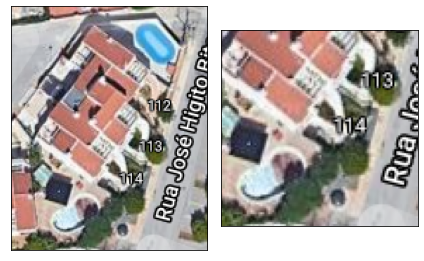

In [28]:
plot([img, out])

### Now, let's try to crop it, flip it and normalize it

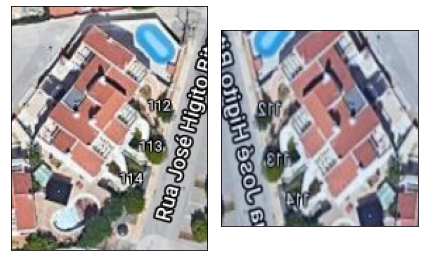

In [48]:
transforms = v2.Compose([
    v2.Lambda(lambda img: img[:3, :, :]),
    v2.RandomResizedCrop(size=(150, 150), antialias=True),
    v2.RandomHorizontalFlip(p=0.5),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
out = transforms(img)

plot([img, out])

In [49]:
print(f"{type(img) = }, {img.dtype = }, {img.shape = }")
print(f"{type(out) = }, {out.dtype = }, {out.shape = }")

type(img) = <class 'torch.Tensor'>, img.dtype = torch.uint8, img.shape = torch.Size([4, 174, 140])
type(out) = <class 'torch.Tensor'>, out.dtype = torch.float32, out.shape = torch.Size([3, 150, 150])


### Let's apply it to the first 50 images:

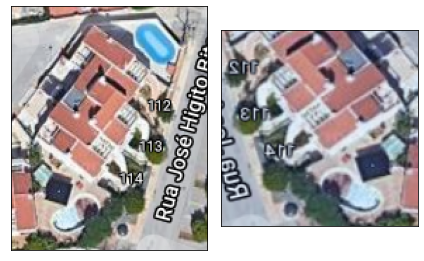

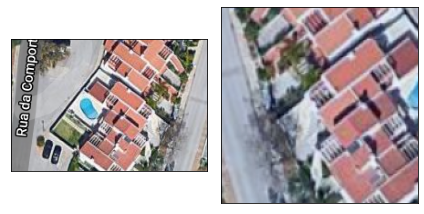

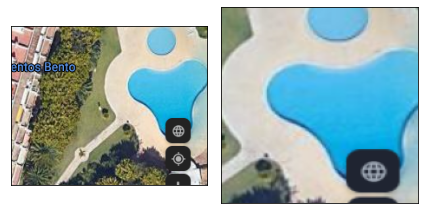

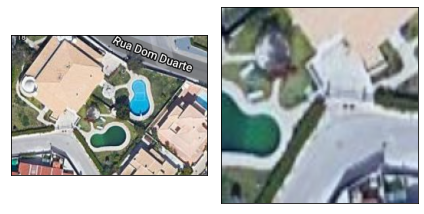

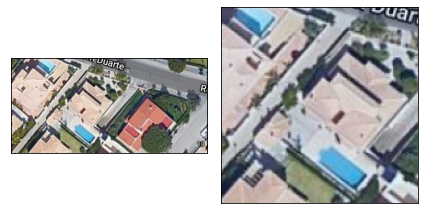

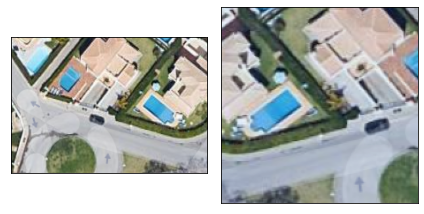

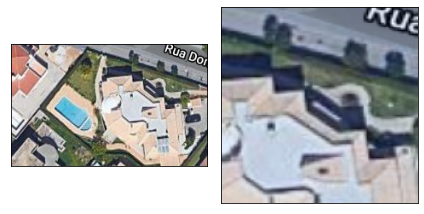

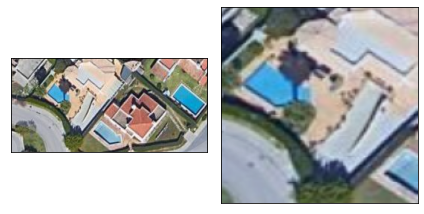

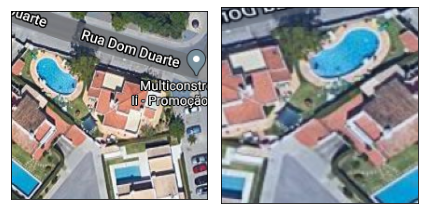

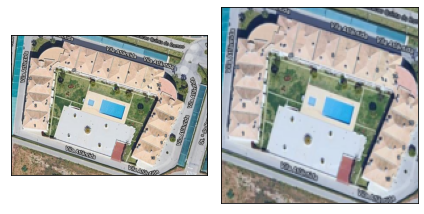

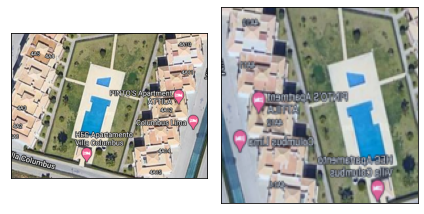

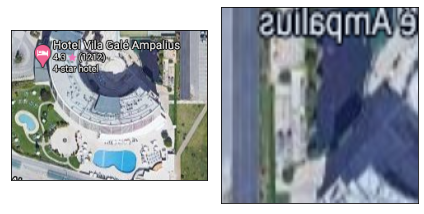

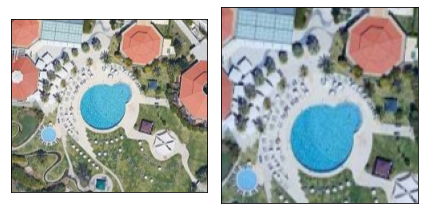

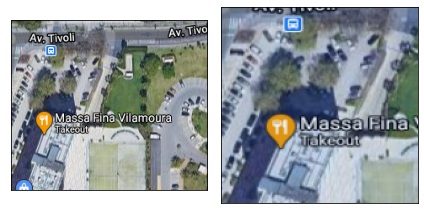

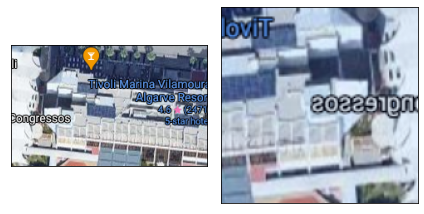

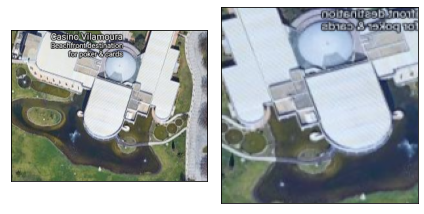

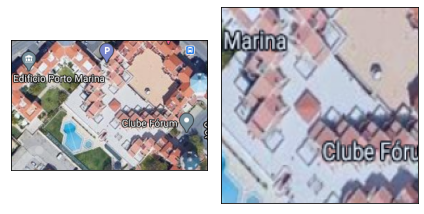

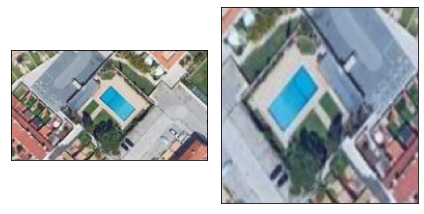

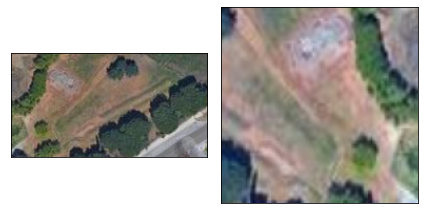

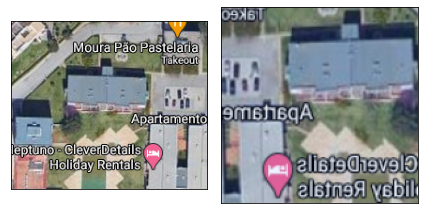

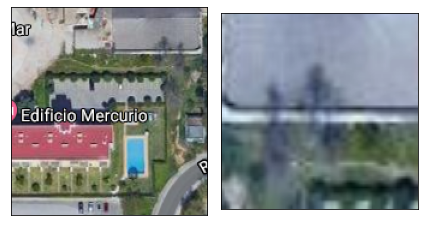

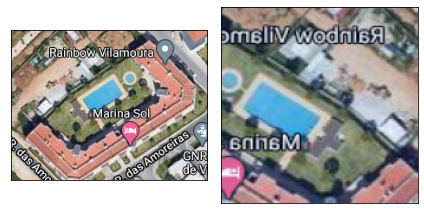

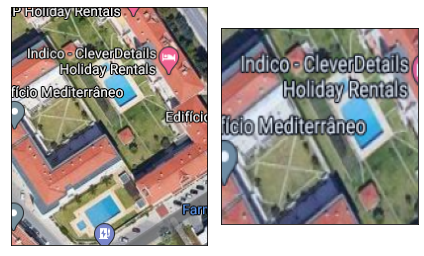

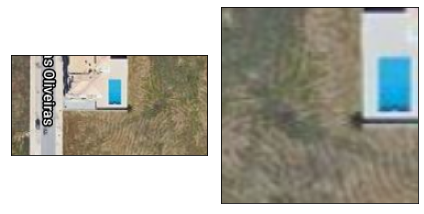

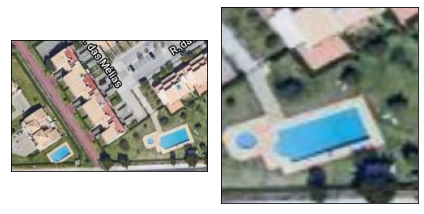

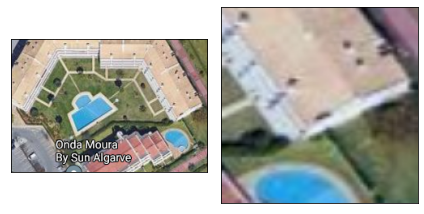

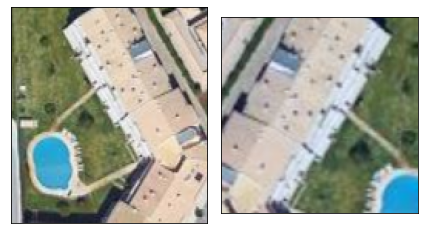

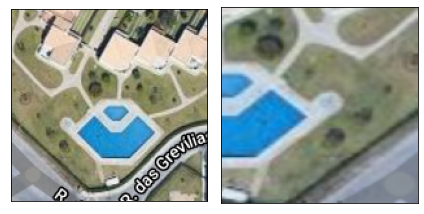

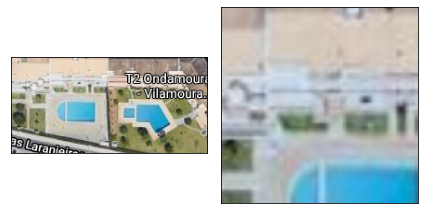

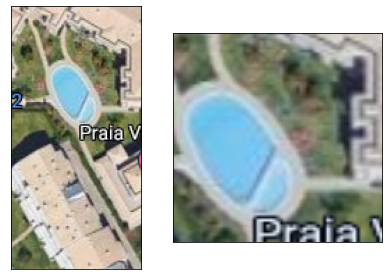

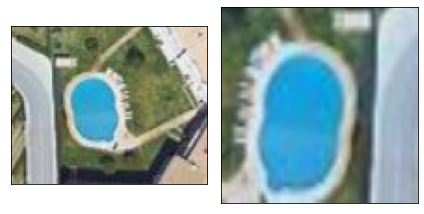

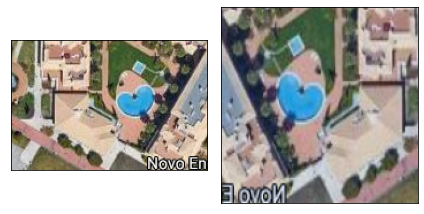

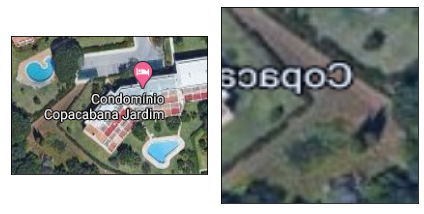

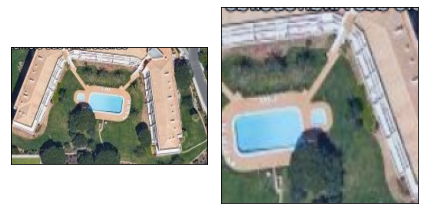

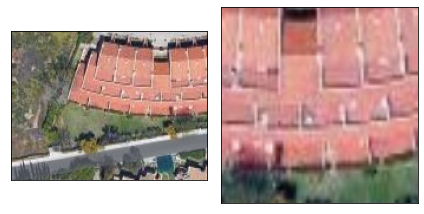

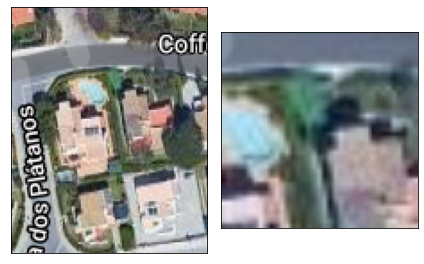

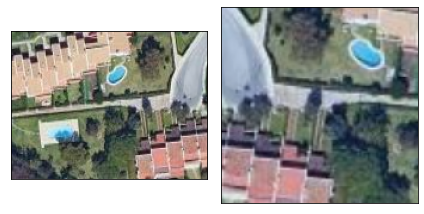

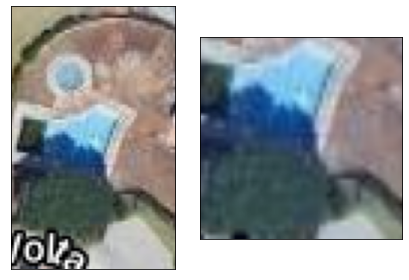

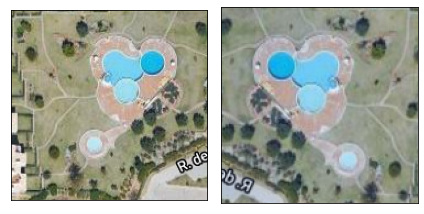

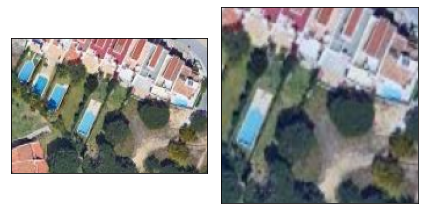

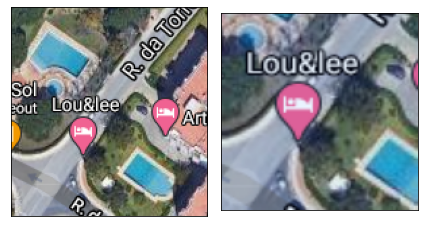

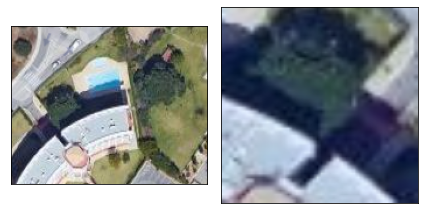

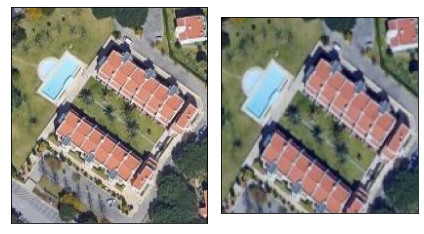

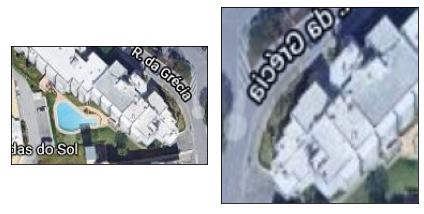

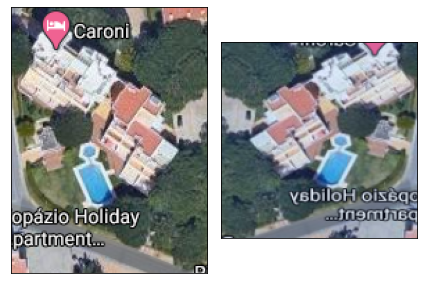

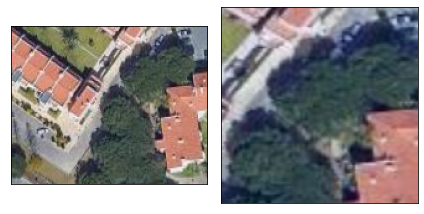

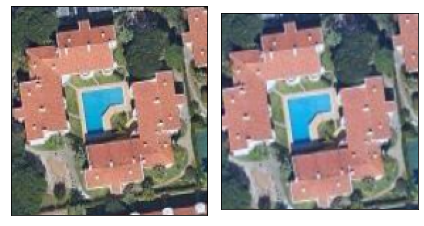

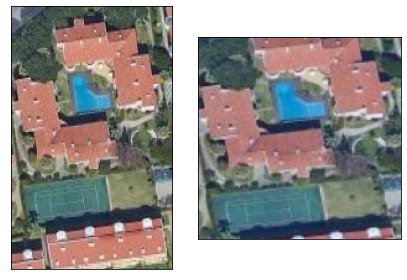

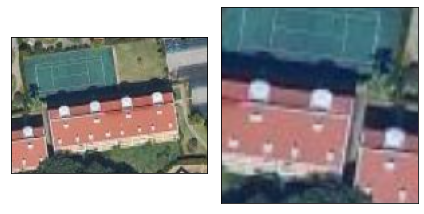

In [51]:
for i in range(1,50):
    img = read_image(str(Path('Algarve/images') / f'{i}.PNG'))
    out = transforms(img)
    plot([img, out])

### Smallest Image
Okay, here the idea is:

    We want to crop the images, but how much? 
    To do this, we must know what is the smallest image in the dataset!

In [56]:
def find_smallest_image(directory):
    smallest_size = float('inf')
    smallest_image = None

    for root, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)

            with Image.open(file_path) as img:
                width, height = img.size

                if width * height < smallest_size:
                    smallest_size = width * height
                    smallest_image = file_path


    return smallest_image, img.size

In [57]:
smallest_image, smallest_size = find_smallest_image('Algarve/images')
print(f"The smallest image is {smallest_image} with size {smallest_size}.")

The smallest image is Algarve/images\38.PNG with size (134, 148).


Just a quick test....

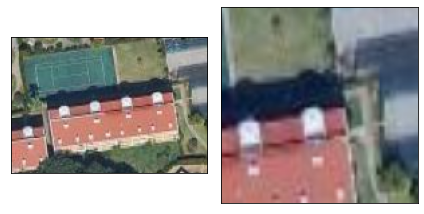

In [55]:
smallest_img = read_image(str(Path('Algarve/images') / f'{i}.PNG'))
out = transforms(smallest_img) #this transforms is changing the shape to 150x150
plot([img, out])

Yhea, we're losing resolution here...

Let's try to adjust the sharpness:

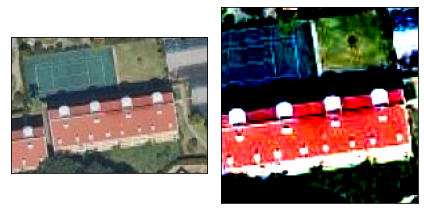

In [68]:
transforms_2 = v2.Compose([
    v2.Lambda(lambda img: img[:3, :, :]),
    v2.RandomResizedCrop(size=(150, 150), antialias=True),
    v2.RandomHorizontalFlip(p=0.5),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    v2.RandomAdjustSharpness(sharpness_factor=2)
])
out = transforms_2(smallest_img)

plot([img, out])

Ehh, meh...